# Pouvoir calorifique

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

mpl.rcParams.update(rcParams)

In [2]:
def load(filename: str):
    return pd.read_csv(filename)

## Theorique

In [3]:
H_theo = 26.8 # MJ

## Mesuré

In [4]:
ethanol = load("../data/ethanol.csv")
ethanol

,M0 [g],M1 [g],m0 [g],m1 [g],Mc [g],T0 [degC],T1 [degC]
0,0,902.0,0.00,1.12,0.3,18.0,25.8
1,0,903.0,2.34,3.65,0.3,18.0,25.8
2,0,1065.0,4.69,6.18,0.3,18.0,25.8
3,0,1020.0,7.03,8.82,0.3,18.0,25.8
4,0,989.0,0.48,2.22,0.3,18.0,27.8
5,0,813.0,3.38,4.86,0.3,18.0,28.1
6,0,1240.0,5.74,7.76,0.3,18.0,28.1
7,0,960.0,0.99,2.64,0.3,18.0,28.3
8,0,941.0,3.39,4.97,0.3,18.0,27.8
9,0,876.0,0.09,1.41,0.3,17.6,27.8


In [5]:
masse_eau = unp.uarray(ethanol["M1 [g]"] * 1e-3, delta_M)
masse_gaz = unp.uarray(ethanol["m1 [g]"] * 1e-3, delta_m) - unp.uarray(ethanol["m0 [g]"] * 1e-3, delta_m)
temperature_diff = unp.uarray(ethanol["T1 [degC]"], delta_T) - unp.uarray(ethanol["T0 [degC]"], delta_T)
masse_eau_cond = unp.uarray(ethanol["Mc [g]"] * 1e-3, delta_Mc)

In [6]:
H = (C_m_eau * masse_eau * temperature_diff - masse_eau_cond * l_vap_eau) / masse_gaz
H *= 1e-6  # MJ

In [7]:
for h in H:
    print(f"H = {h:.1uP} MJ")

H = 25.7±0.8 MJ
H = 22.0±0.7 MJ
H = 22.8±0.6 MJ
H = 18.2±0.5 MJ
H = 22.9±0.5 MJ
H = 22.7±0.6 MJ
H = 25.6±0.5 MJ
H = 24.6±0.6 MJ
H = 24.0±0.6 MJ
H = 27.8±0.8 MJ
H = 24.0±0.6 MJ
H = 21.6±0.6 MJ
H = 24.5±0.6 MJ
H = 25.1±0.6 MJ
H = 24.8±0.7 MJ
H = 26.6±0.7 MJ


In [8]:
H_avg = np.mean(H)
# Devrait être calculé par uncertainties, maaaaaais bon faudrait
# calculer à la main @martin
H_std_dev = (1 / (len(H) - 1) * np.sum((H - H_avg) ** 2)) ** 0.5


In [9]:
print(f"H moyen = {H_avg:.1uP} MJ")
print(f"H std dev = {H_std_dev:.1uP} MJ")

H moyen = 23.9±0.2 MJ
H std dev = 2.3±0.2 MJ


## Plot

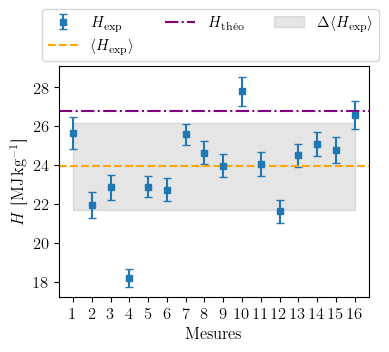

In [23]:
samples = np.arange(len(H))
plt.errorbar(samples, unp.nominal_values(H), yerr=unp.std_devs(H), marker='s', ms=5, ls='none', label=r"$H_\textrm{exp}$")
plt.fill_between(samples, H_avg.n - H_std_dev.n, H_avg.n + H_std_dev.n, color='tab:grey', alpha=0.2, label=r"$\Delta\langle H_\textrm{exp} \rangle$")

plt.axhline(H_theo, color='purple', linestyle="-.", label=r"$H_\textrm{théo}$")
plt.axhline(H_avg.n, color='orange', linestyle="--", label=r"$\langle H_\textrm{exp} \rangle$")

plt.xticks(samples, samples + 1)
# plt.xticks(samples, samples + 1, rotation=-45)
plt.xlabel("Mesures")
plt.ylabel(r"$H$ [\si{\mega\joule\per\kilo\gram}]")
plt.legend(reverse=True, ncols=3, loc='upper left', bbox_to_anchor=(-0.08, 1.28))

plt.savefig('../figures/ethanol.pdf', bbox_inches="tight")

# CO2

In [11]:
mol_gaz = masse_gaz*1e3/m_mol_ethanol

mol_co2 = 2*mol_gaz
mol_co2_mean = np.mean(mol_co2)
print(f"CO2 expulsé moyen par exp = {mol_co2_mean:.1uP} mol")

mass_co2 = mol_co2*m_mol_co2
mass_co2_mean = np.mean(mass_co2)
print(f"CO2 expulsé moyen par exp = {mass_co2_mean:.1uP} g")

# mass_co2_std = unp.std_devs(mass_co2_mean)

mass_co2_std = unp.nominal_values((1 / (len(mass_co2) - 1) * np.sum((mass_co2 - mass_co2_mean) ** 2)) ** 0.5)


CO2 expulsé moyen par exp = 0.0657±0.0003 mol
CO2 expulsé moyen par exp = 2.89±0.01 g


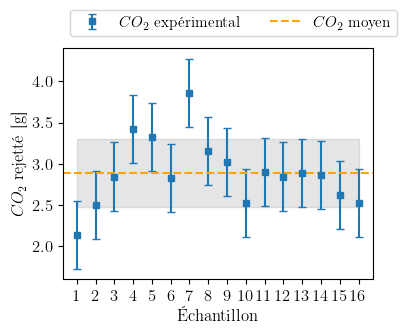

In [12]:
plt.errorbar(samples, unp.nominal_values(mass_co2), yerr=mass_co2_std, marker='s', ms=5, ls='none', label=r"$CO_2$ expérimental")
plt.fill_between(samples, mass_co2_mean.n - mass_co2_std, mass_co2_mean.n + mass_co2_std, color='tab:grey', alpha=0.2)

plt.axhline(mass_co2_mean.n, color='orange', linestyle="--", label=r"$CO_2$ moyen")

plt.xticks(samples, samples + 1)
# plt.xticks(samples, samples + 1, rotation=-45)
plt.xlabel("Échantillon")
plt.ylabel(r"$CO_2$ rejetté [\si{\gram}]")
plt.legend(reverse=True, ncols=3, loc='upper left', bbox_to_anchor=(0, 1.2))

plt.savefig('../figures/mass_co2_ethanol.pdf', bbox_inches="tight")